# Proyek Analisis Data: Bike-sharing-dataset
- Nama:Mohamad Dimas Amardika
- Email:dimasamardika24@gmail.com
- Id Dicoding:https://www.dicoding.com/users/victor12/academies

## Menentukan Pertanyaan Bisnis

- Apakah ada perbedaan dalam penggunaan sepeda antara hari kerja dan akhir pekan?
- Kapan jam-jam paling sibuk untuk penggunaan sepeda selama sehari?
- Apakah ada pengaruh cuaca terhadap penggunaan sepeda seperti saat cuaca cerah dibandingkan dengan cuaca berawan atau hujan?
- Bagaimana distribusi pengguna sepeda berdasarkan jenisnya(casual/registered)


## Menyaipkan semua library yang dibutuhkan

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

## Data Wrangling

### Gathering Data

> import the "day" table data

In [57]:
day_df = pd.read_csv("https://raw.githubusercontent.com/dimsdika12/data-analytics-projects/main/Bike-sharing-project/dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


> import the "hour" table data

In [58]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/dimsdika12/data-analytics-projects/main/Bike-sharing-project/dataset/hour.csv")
hour_df.head(26)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


### Assessing Data

> assesing table `day_df`

In [59]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [60]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [61]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [62]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


> assesing table `hour_df`

In [63]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [64]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [65]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [66]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [67]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

the data is clean,so no further action is needed

## Exploratory Data Analysis (EDA)

### Explore `hour_df`
  Both hour_df and day_df have the same fields, except hr which is not available in day_df. So,I prefer to use hour_df.

In [68]:
hour_df.sample()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
11625,11626,2012-05-04,2,1,5,14,0,5,1,2,0.66,0.6212,0.74,0.2836,83,159,242


In [69]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


change format dteday to datetime

In [70]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

Takes the name of the day and stores it in a new column `'day_of_week'`

In [71]:
hour_df['day_of_week'] = hour_df['dteday'].dt.strftime('%A')

In [72]:
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_week
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,Saturday
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,Saturday
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,Saturday
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,Saturday
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,Monday
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,Monday
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,Monday
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,Monday


> number of riders per days of week

In [73]:
daily_data = hour_df.groupby("day_of_week")[['casual', 'registered','cnt']].sum().reset_index()
daily_data = daily_data.rename(columns={'cnt': 'total'})
daily_data.sort_values("total")

,day_of_week,casual,registered,total
3,Sunday,140521,303506,444027
1,Monday,70784,384719,455503
5,Tuesday,57843,411266,469109
6,Wednesday,57319,415729,473048
2,Saturday,153852,323955,477807
4,Thursday,61460,423935,485395
0,Friday,78238,409552,487790


>number of riders per hours

In [74]:
hourly_data = hour_df.groupby("hr")[['casual','registered','cnt']].sum().reset_index()
hourly_data = hourly_data.rename(columns={'hr': 'hour','cnt':'total'})
hourly_data.sort_values("hour")

,hour,casual,registered,total
0,0,7375,31755,39130
1,1,4709,19455,24164
2,2,3412,12940,16352
3,3,1893,6281,8174
4,4,874,3554,4428
5,5,1012,13249,14261
6,6,3017,52115,55132
7,7,8037,146134,154171
8,8,15761,245240,261001
9,9,22458,136980,159438


number of riders by weathersit

+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [75]:
weather_data = hour_df.groupby("weathersit")[['casual','registered','cnt']].sum().reset_index()
weather_data = weather_data.rename(columns={'cnt': 'total'})
weather_labels = {
    1: '1: Clear, Few Clouds',
    2: '2: Mist + Cloudy',
    3: '3: Light Snow, Light Rain',
    4: '4: Heavy Rain, Snow + Fog'
}

weather_data['weathersit'] = weather_data['weathersit'].map(weather_labels)
weather_data

,weathersit,casual,registered,total
0,"1: Clear, Few Clouds",462745,1875428,2338173
1,2: Mist + Cloudy,134481,661471,795952
2,"3: Light Snow, Light Rain",22783,135548,158331
3,"4: Heavy Rain, Snow + Fog",8,215,223


>Total number of riders

In [76]:
total_rental_bikes = hour_df['cnt'].sum()
total_rental_bikes

3292679

> Total number of riders by type

In [77]:
total_casual_users = hour_df['casual'].sum()
total_registered_users = hour_df['registered'].sum()

total_data = pd.DataFrame({
    'Type': ['casual', 'registered', ],
    'Count': [total_casual_users, total_registered_users]
})

total_data

,Type,Count
0,casual,620017
1,registered,2672662


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah ada perbedaan dalam penggunaan sepeda antara hari kerja dan akhir pekan?

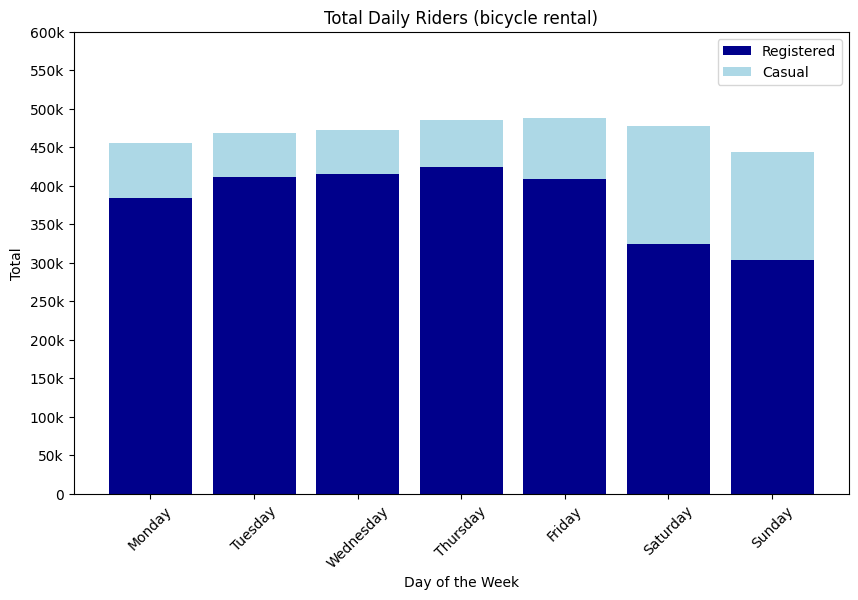

In [85]:
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_data['day_of_week'] = pd.Categorical(daily_data['day_of_week'], categories=ordered_days, ordered=True)
daily_data = daily_data.sort_values('day_of_week')

fig, ax = plt.subplots(figsize=(10, 6))

casual = daily_data['casual']
registered = daily_data['registered']
day_of_week = daily_data['day_of_week']

plt.bar(day_of_week, registered, label='Registered', color='darkblue')
plt.bar(day_of_week, casual, bottom=registered, label='Casual', color='lightblue')

plt.xlabel('Day of the Week')
plt.ylabel('Total')
plt.title('Total Daily Riders (bicycle rental)')
plt.xticks(rotation=45)
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{int(x/1000)}k' if x > 0 else '0'))
ax.set_yticks(range(0, 650000, 50000))
plt.legend()


plt.show()

### Pertanyaan 2: Kapan jam-jam paling sibuk untuk penggunaan sepeda selama sehari?

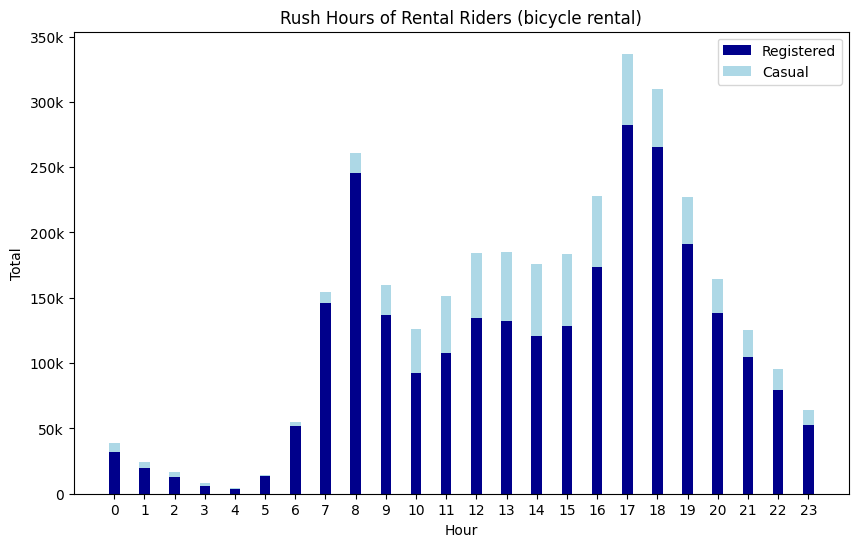

In [79]:
#bar chart
fig, ax = plt.subplots(figsize=(10, 6))

hour = hourly_data['hour']
registered = hourly_data['registered']
casual = hourly_data['casual']


bar_width = 0.35
plt.bar(hour, registered, bar_width, label='Registered', color='darkblue')
plt.bar(hour, casual, bar_width, label='Casual', bottom = registered, color='lightblue')

plt.xlabel('Hour')
plt.ylabel('Total')
plt.title('Rush Hours of Rental Riders (bicycle rental)')
plt.xticks(hour)
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{int(x/1000)}k' if x > 0 else '0'))
ax.set_yticks(range(0, 400000, 50000))
plt.legend()

plt.show()

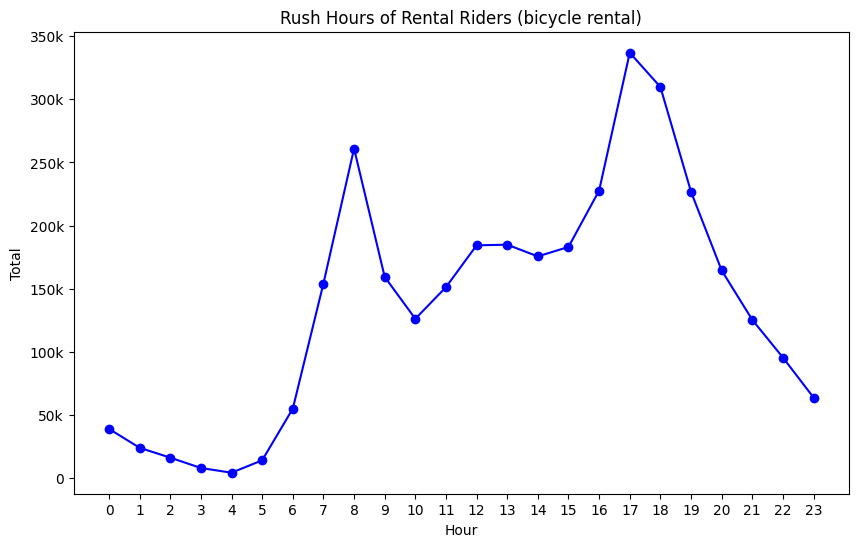

In [80]:
#Line chart
plt.figure(figsize=(10, 6))
plt.plot(hourly_data['hour'], hourly_data['total'], marker='o', linestyle='-', color='b')

plt.xlabel('Hour')
plt.ylabel('Total')
plt.title('Rush Hours of Rental Riders (bicycle rental)')
plt.xticks(hour)

ax = plt.gca()
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{int(x/1000)}k' if x > 0 else '0'))
ax.set_yticks(range(0, 400000, 50000))


plt.show()

### Pertanyaan 3: Apakah ada pengaruh cuaca terhadap penggunaan sepeda seperti saat cuaca cerah dibandingkan dengan cuaca berawan atau hujan?

> note :
- weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

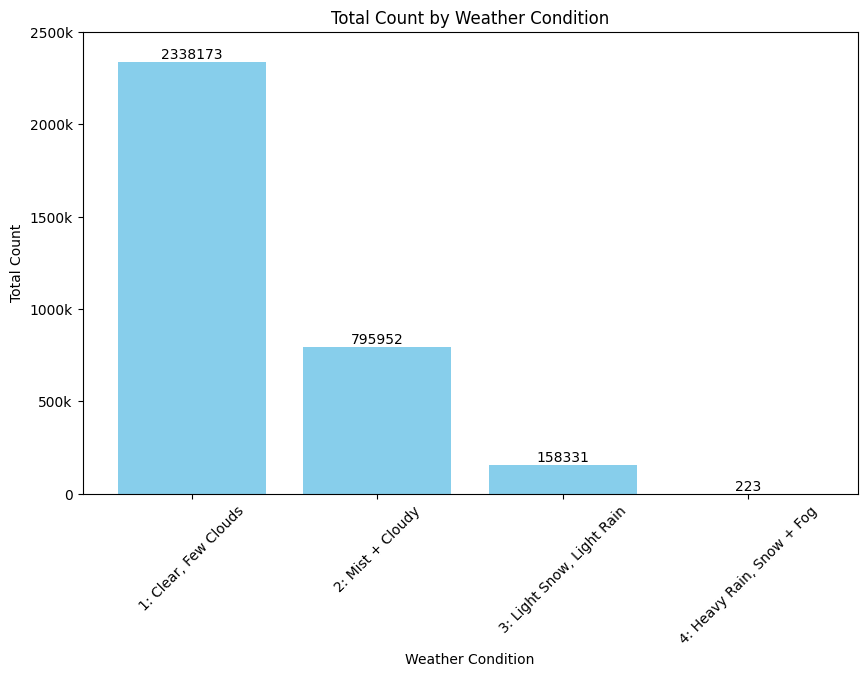

In [81]:
plt.figure(figsize=(10, 6))
bars = plt.bar(weather_data['weathersit'], weather_data['total'], color='skyblue')

plt.xlabel('Weather Condition')
plt.ylabel('Total Count')
plt.title('Total Count by Weather Condition')
plt.xticks(rotation=45)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{int(x/1000)}k' if x > 0 else '0'))
ax.set_yticks(range(0, 3000000, 500000))
for bar, data_point in zip(bars, weather_data['total']):
    plt.text(bar.get_x() + bar.get_width() / 2, data_point, str(data_point), ha='center', va='bottom')


plt.show()

### Pertanyaan 4: Bagaimana distribusi pengguna sepeda berdasarkan jenisnya(casual/registered)

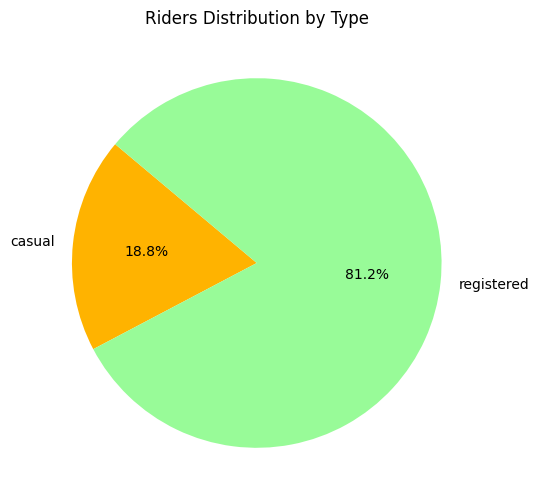

In [91]:
colors = ['#FFB300', '#98FB98']


plt.figure(figsize=(6, 6))
plt.pie(total_data['Count'], labels=total_data['Type'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Riders Distribution by Type')

plt.show()

## Conclusion

- **Conclution pertanyaan 1 :** Perbedaan jumlah pengendara sepeda antara hari kerja dan akhir pekan tidak signifikan, meskipun akhir pekan cenderung memiliki sedikit pengendara dibandingkan dengan hari kerja. Namun, pada akhir pekan, terjadi peningkatan signifikan pada pengguna casual, sementara pengguna registered mengalami penurunan.
- **Conclution pertanyaan 2 :** Jam-jam yang paling ramai pengguna sepeda adalah pukul 17, pukul 18, dan pukul 8.
- **Conclution pertanyaan 3 :** Jumlah pengguna sepeda mengalami penurunan yang signifikan saat kondisi cuaca tidak baik.
- **Conclution pertanyaan 3 :** Presentase jeni pengguna registered 81.2% sedangkan casual 18.8%
